In [4]:
# DATA

import yfinance as yf
import numpy as np
import matplotlib as mp
import pandas as pd
import os

In [5]:
# EGLD is a cryptocurrency 

initial_data = yf.download("EGLD-USD", start="2021-03-31", end="2022-03-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-30,143.617584,146.218658,141.926407,142.901672,142.901672,70809134
2021-03-31,142.928391,144.664581,133.951889,139.916443,139.916443,74541237
2021-04-01,139.793060,150.234558,138.062485,150.085205,150.085205,112577180
2021-04-02,150.539627,173.083160,150.539627,167.626541,167.626541,258165789
2021-04-03,168.025253,186.453140,156.502029,158.691376,158.691376,267613693


In [7]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-26,181.813629,190.528366,177.906601,189.090408,189.090408,193034311
2022-03-27,189.074966,199.271851,186.166534,198.816269,198.816269,132761770
2022-03-28,198.814407,213.313553,191.903351,192.618713,192.618713,289031847
2022-03-29,192.546722,204.183609,192.546722,197.136566,197.136566,184528316
2022-03-30,197.083069,202.311142,191.853745,197.934265,197.934265,165784559


In [8]:
initial_data['Adj Close'].tail(130) # EGLD_6M 

Date
2021-11-21    427.110626
2021-11-22    490.349091
2021-11-23    468.766052
2021-11-24    453.844727
2021-11-25    450.329742
                 ...    
2022-03-26    189.090408
2022-03-27    198.816269
2022-03-28    192.618713
2022-03-29    197.136566
2022-03-30    197.934265
Name: Adj Close, Length: 130, dtype: float64

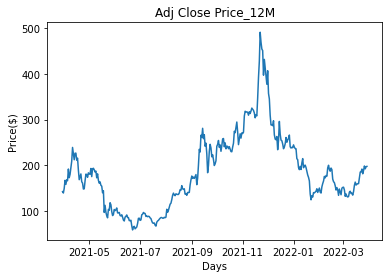

In [9]:
import matplotlib.pyplot as plt # Movement of the crypto Adj Close price (12M)
fig = plt.figure()
plt.plot(initial_data['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price($)')
plt.title('Adj Close Price_12M');

In [10]:
log_return_12M = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
log_return_12M[:5]

Date
2021-03-30         NaN
2021-03-31   -0.021111
2021-04-01    0.070158
2021-04-02    0.110535
2021-04-03   -0.054777
Name: Adj Close, dtype: float64

In [11]:
initial_datavol = log_return_12M.std() * np.sqrt(365)
print('The annualised volatility over 12 months is', round(initial_datavol * 100,2), '%')

The annualised volatility over 12 months is 128.4 %


In [12]:
initial_datavol = log_return_12M[183:-1].std() * np.sqrt(365)
print('The annualised volatility over last 6 months is', round(initial_datavol * 100,2), '%')

The annualised volatility over last 6 months is 108.09 %


In [13]:
# Cash-or-Nothing Binary put option (EGLD)
# Pricing methods

# 1 Binomial Tree Method

S0 =195 # # spot crypto price dated 21-03-2021
K = 185
T = 2/12
r = 0.3 # dated 31-03-2022
sigma = 1.08 # from calculated volatility (prior 6M period)
N = 10
payoff = "put"

In [14]:
dT = float(T) / N
u = np.exp(sigma * np.sqrt(dT))
d = 1 / u

In [15]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[195.        , 224.17499152, 257.71500936, 296.2731284 ,
        340.60013358, 391.55913876, 450.14239288, 517.49060056,
        594.9151333 , 683.92356393, 786.24902126],
       [  0.        , 169.62195355, 195.        , 224.17499152,
        257.71500936, 296.2731284 , 340.60013358, 391.55913876,
        450.14239288, 517.49060056, 594.9151333 ],
       [  0.        ,   0.        , 147.54670322, 169.62195355,
        195.        , 224.17499152, 257.71500936, 296.2731284 ,
        340.60013358, 391.55913876, 450.14239288],
       [  0.        ,   0.        ,   0.        , 128.34441046,
        147.54670322, 169.62195355, 195.        , 224.17499152,
        257.71500936, 296.2731284 , 340.60013358],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        111.64117759, 128.34441046, 147.54670322, 169.62195355,
        195.        , 224.17499152, 257.71500936],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  97.11176738, 111.6

In [16]:
a = np.exp(r * dT)    # risk-free rate (compounded)
p = (a - d)/ (u - d)  # up
q = 1 - p           # down
p

0.48311677946665543

In [17]:
S_T = S[:,-1]
S_T

array([786.24902126, 594.9151333 , 450.14239288, 340.60013358,
       257.71500936, 195.        , 147.54670322, 111.64117759,
        84.47327024,  63.91667966,  48.36254033])

In [18]:
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.heaviside(S_T - K >0, 0.0)
elif payoff =="put":
    V[:,-1] = np.heaviside(K - S_T >0, 0.0)
V

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [19]:
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        V[i, j] = np.exp(- r * dT) * (p * V[i, j + 1] + q * V[i + 1, j + 1])
V

array([[0.39869683, 0.27555697, 0.16123984, 0.07179169, 0.01850656,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.51765873, 0.38507834, 0.24640824, 0.12229207,
        0.03598362, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.64659808, 0.51842386, 0.36480584,
        0.20414819, 0.06996548, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.7726695 , 0.66703393,
        0.51850594, 0.33154488, 0.13603883, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.87889725,
        0.81232765, 0.69828166, 0.51749428, 0.2645099 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.94964125, 0.92680097, 0.87403039, 0.7589704 , 0.51430525,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [20]:
print('Binary ' + payoff, str( V[0,0]))

Binary put 0.398696828975905


In [21]:
# 2 MONTE CARLO SIMULATION 

def mcs_simulation_np(m,n):  # m is 10 STEPS and n is 10000 simulations
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [22]:
S = mcs_simulation_np(10,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

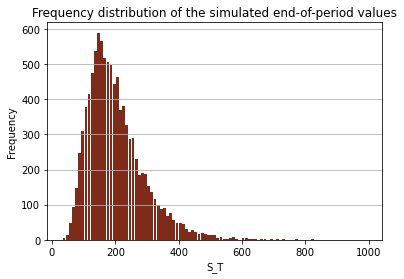

In [23]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#7f2B19',alpha=1.0, rwidth=0.90)

plt.grid(axis='y', alpha=1.0)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [24]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Monte Carlo: Binary put', str(bpp))

Monte Carlo: Binary put 0.5048


In [25]:
# 3 BLACK-SCHOLES METHOD

import scipy.stats as si

In [26]:
def binary_option_BS(S, K, T, r, sigma, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) # binary call option value
    elif payoff == "put":
        option_value = np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) # binary put option value
    
    return option_value

In [27]:
pp = binary_option_BS(195, 185, 2/12, 0.3, 1.08, "put")
pp

0.47092945941189307

In [28]:
cp = binary_option_BS(195, 185, 2/12, 0.3, 1.08, "call")
cp

0.48029996508882095

In [29]:
pp + cp # Put-Call Parity

0.951229424500714

In [30]:
S = np.linspace(100,350,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12] 

In [67]:
pp = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        pp[i,j] = binary_option_BS(S[j], 185, T[i], 0.3, 1.08, "put")

C:\Users\tudor\AppData\Local\Temp/ipykernel_166800/2624213236.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


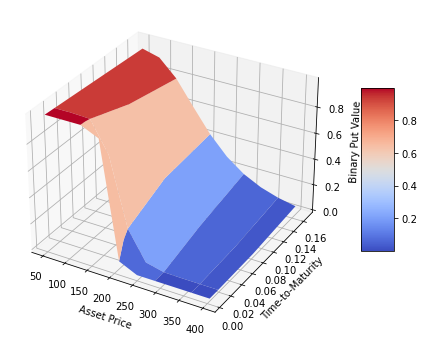

In [68]:
# Binary put option value

Asset_Price, TTM = np.meshgrid(S, T)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Asset_Price, TTM, pp, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary Put Value')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [33]:
# ANALYSIS

# GREEKS

# DELTA: rate of change of hypothetical option value with respect to changes in the underlying asset price

def delta(S, K, T, r, sigma, payoff):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    elif payoff == "put":
        delta = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    return delta

In [34]:
delta(195, 185, 2/12, 0.3, 1.08, "put")

-0.004413463083323937

In [35]:
S = np.linspace(100,350,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12] 

In [36]:
Delta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Delta_Put[i,j] = delta(S[j], 185, T[i], 0.3, 1.08, "put") 

C:\Users\tudor\AppData\Local\Temp/ipykernel_166800/3580472086.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


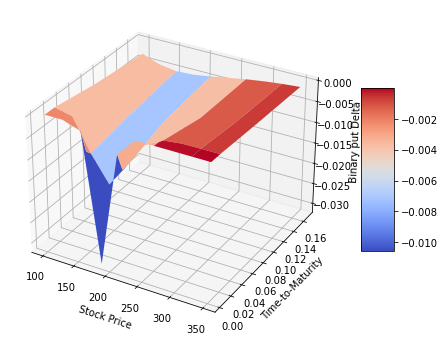

In [37]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Stock, TTM, Delta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [38]:
# GAMMA: rate of change in the delta with respect to changes in the underlying price

def gamma(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        gamma = - np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    elif payoff == "put":
        gamma = np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    return gamma

In [39]:
gamma(195, 185, 2/12, 0.3, 1.08, "put")

1.5831143492540313e-06

In [40]:
S = np.linspace(50,450,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12]

In [41]:
Gamma_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Gamma_Put[i,j] = gamma(S[j], 185, T[i], 0.3, 1.08, "put") 

C:\Users\tudor\AppData\Local\Temp/ipykernel_166800/2989575019.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


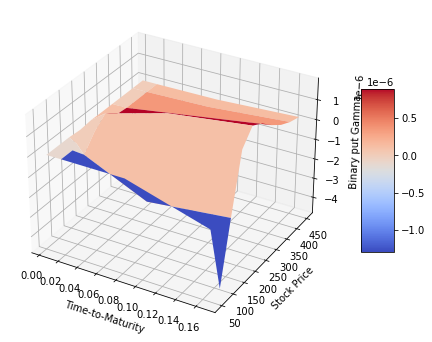

In [42]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Stock, Gamma_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [43]:
S = np.linspace(50,450,10)
Gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma_Put[i] = gamma(S[i], 185, 2/12, 0.3, 1.08, "put") 

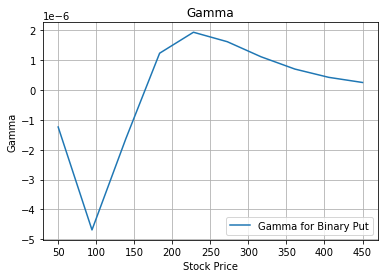

In [44]:
# gamma detail at expiry 

fig = plt.figure()
plt.plot(S, Gamma_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Binary Put'])

In [45]:
# THETA: measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

def theta(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        theta = (r * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    elif payoff == "put":
        theta = (r * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    return theta

In [46]:
theta(195, 185, 2/12, 0.3, 1.08, "put")

0.01801364757746161

In [47]:
T = [1/252, 3/252, 1/52, 1/12, 2/12]
S = np.linspace(150,350,10)

In [48]:
Theta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Theta_Put[i,j] = theta(S[j], 185, T[i], 0.3, 1.08, "put")

C:\Users\tudor\AppData\Local\Temp/ipykernel_166800/2771299475.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


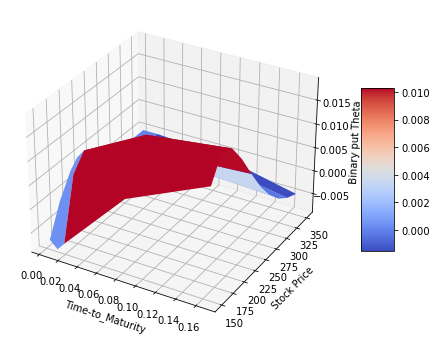

In [49]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Stock, Theta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to_Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [50]:
# SPEED: measures the rate of change in Gamma with respect to changes in the underlying price

def speed(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        speed = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    elif payoff == "put":
        speed = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    return speed

In [51]:
speed(195, 185, 2/12, 0.3, 1.08, "put")

1.4496003174200296e-07

In [52]:
S = np.linspace(50,400,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12]

In [53]:
Speed_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Speed_Put[i,j] = speed(S[j], 185, T[i], 0.3, 1.08, "put") 

C:\Users\tudor\AppData\Local\Temp/ipykernel_166800/1312249701.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


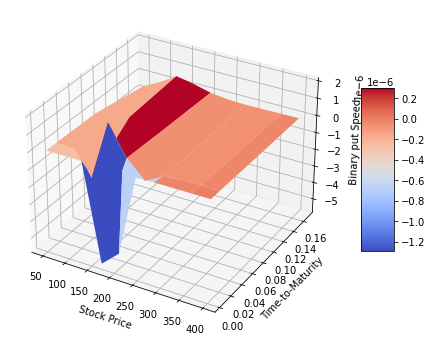

In [54]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Stock, TTM, Speed_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [55]:
S = np.linspace(50,400,10)
Speed_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Speed_Put[i] = speed(S[i], 185, 2/12, 0.3, 1.08, "put") 

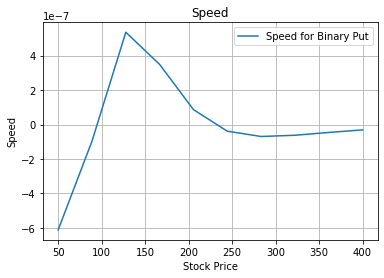

In [56]:
# speed detail at expiry 

fig = plt.figure()
plt.plot(S, Speed_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Binary Put'])

In [57]:
# VEGA: measures sensitivity to volatility

def vega(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        vega = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    elif payoff == "put":
        vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    return vega

In [58]:
vega(195, 185, 2/12, 0.3, 1.08, "put")

0.15925053086430532

In [59]:
sigma = np.linspace(0.10,1,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12] 

In [60]:
Vega_Put = np.zeros((len(T),len(sigma)))
for i in range(len(T)):
    for j in range(len(sigma)):
        Vega_Put[i,j] = vega(195, 185, T[i], 0.3, sigma[j], "put") 

C:\Users\tudor\AppData\Local\Temp/ipykernel_166800/3821449139.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


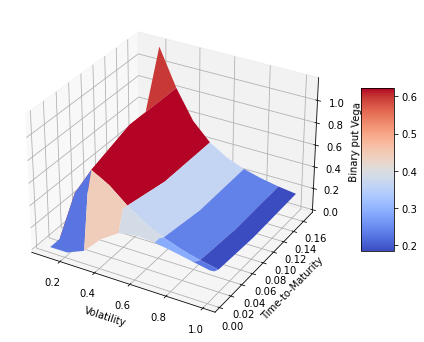

In [61]:
Vol, TTM = np.meshgrid(sigma, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Vol, TTM, Vega_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Volatility')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [62]:
# RHO: measures sensitivity to the interest rate

def rho(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        rho =  - T * np.exp(-r * T) * si.norm.cdf(d2) + ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    elif payoff == "put":
        rho =  - T * np.exp(-r * T) * (1 - si.norm.cdf(d2)) - ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    return rho

In [63]:
rho(195, 185, 2/12, 0.3, 1.08, "put")

-0.22192579344334346

In [64]:
r = np.linspace(0,0.03,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12]

In [65]:
Rho_Put = np.zeros((len(T),len(r)))
for i in range(len(T)):
    for j in range(len(r)):
        Rho_Put[i,j] = rho(195, 185, T[i], r[j], 1.08, "put") 

C:\Users\tudor\AppData\Local\Temp/ipykernel_166800/1969783652.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


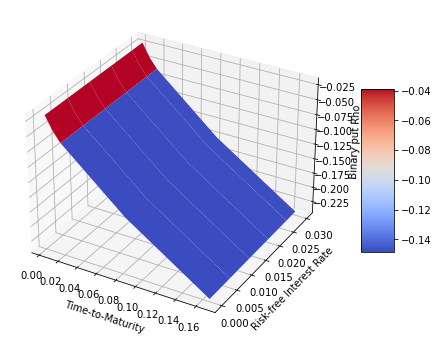

In [66]:
Int, TTM = np.meshgrid(r, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Int, Rho_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Risk-free Interest Rate')
ax.set_zlabel('Binary put Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);